In [1]:
# 股票数据
import os
stockName = [i.split('.')[0] for i in os.listdir(r'..\Data')][:-2]

In [6]:
# 夏普率
import pandas as pd
import numpy as np

def sharpe_Ratio(rate):
    # 无风险收益率：3%
    rate = pd.Series(rate)-1 # 每日收益率
    sharpe_ratio = (np.sum(rate)/len(rate)-0.03) / np.std(rate)
    return sharpe_ratio

In [7]:
#  最大回测率
def maxDrawdown(return_list):
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    return (return_list[j] - return_list[i]) / (return_list[j])

In [2]:
# Behavior clone 测试
import torch
from Data.stock_data import data
from Env.tradeEnv import portfolio_tradeEnv
from Model.BC.Behavioral_Cloning_Agent import BehaviorClone

In [3]:
def multi_test_BC(code):
    BC_agent = BehaviorClone(state_dim=150, hidden_dim=50, action_dim=3, device="cuda:0", lr=0.01,
                             timeperiod=15,
                             K=2000,
                             path=r'..\Data\\'+code+'.csv',
                             batch_size=512)

    trade_df = data(link=BC_agent.path, window_length=15, t=2000).trade_data()

    # 测试DQN网络
    # trade_Env = portfolio_tradeEnv(day=0, stock=trade_df, balance=100000, cost=0.003)
    # BC_agent.dqn.load_state_dict(torch.load(r'..\Model\BC\Q_network\\'+code+'_BC_DQN.pt'))
    # BC_agent.test_BC(env=trade_Env, agent=BC_agent.dqn, trade_df=trade_df, type='BC DQN')
    # del trade_Env

    # 测试Dueling DQN网络
    trade_Env = portfolio_tradeEnv(day=0, stock=trade_df, balance=100000, cost=0.003)
    BC_agent.ddqn.load_state_dict(torch.load(r'..\Model\BC\Dueling_Q_network\\'+code+'_BC_DdQN.pt'))
    BC_agent.test_BC(env=trade_Env, agent=BC_agent.ddqn, trade_df=trade_df, type='BC DDQN')
    return trade_Env.rate

Balance: 0 Close Price: 17.57 Shares: 6702.983343008003


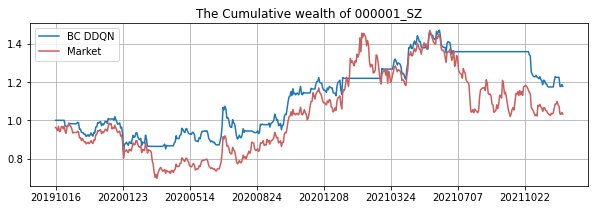

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9716144297852984,
 0.9686995864959425,
 0.9686995864959425,
 0.9721469161508544,
 0.9853616790426276,
 0.9824055940054998,
 0.9824055940054998,
 0.9824055940054998,
 0.9824055940054998,
 0.9824055940054998,
 0.9824055940054998,
 0.9818039988004537,
 0.98300718982731,
 0.9896247414001653,
 0.9872183587296888,
 0.9535290062771296,
 0.9541306014821757,
 0.937887521077706,
 0.935073858514473,
 0.935073858514473,
 0.926094276187858,
 0.9272915537086602,
 0.9153187772731735,
 0.9195092489028474,
 0.9248969986670559,
 0.9165160547939757,
 0.9236997211462538,
 0.9338765809936708,
 0.922502443011719,
 0.9177133323147778,
 0.93746841416981,
 0.9338765809936708,
 0.9650058002169224,
 0.9656044392841897,
 0.9877540761808261,
 0.9853595211392218,
 0.9907472702896978,
 0.9931418259450348,
 0.9721894665692004,
 0.9817676879630829,
 0.9757812997453394,
 0.9859581595927566,
 0.9955363809866389,
 0.9919445478104999,
 0.9847608820719546,
 1.0

In [4]:
multi_test_BC(stockName[0])

Balance: 0 Close Price: 17.57 Shares: 6702.983343008003


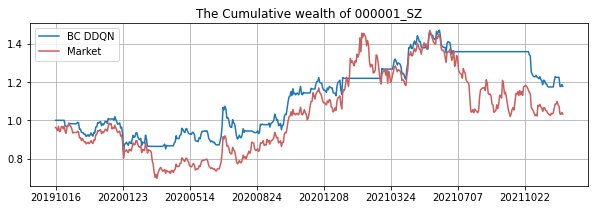

Balance: 0 Close Price: 19.53 Shares: 3351.3060671481658


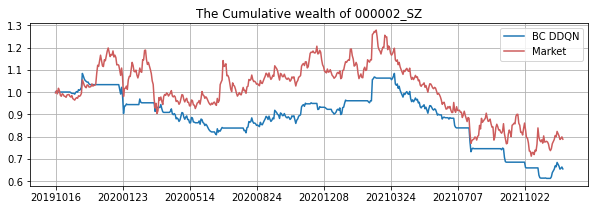

Balance: 130873.41050095177 Close Price: 248.51 Shares: 0


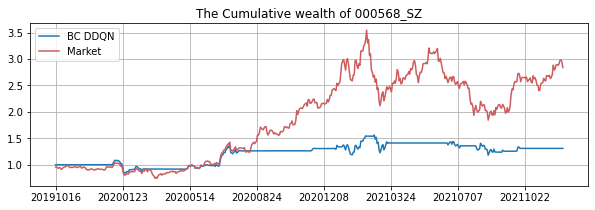

Balance: 156211.91006531898 Close Price: 17.17 Shares: 0


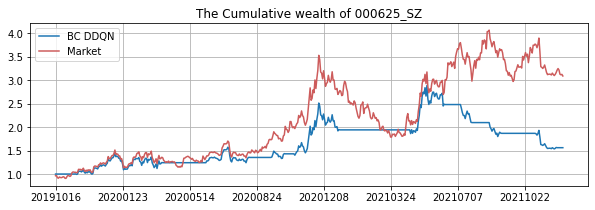

Balance: 0 Close Price: 35.5 Shares: 2980.830225356818


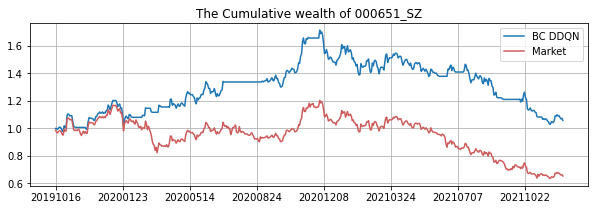

Balance: 147372.12448489128 Close Price: 24.4 Shares: 0


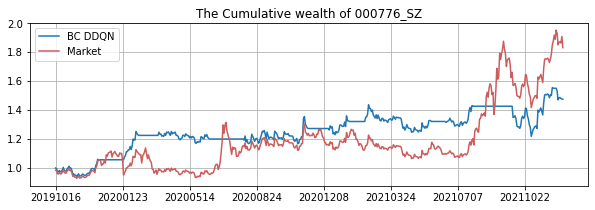

Balance: 0 Close Price: 21.68 Shares: 4702.981142326254


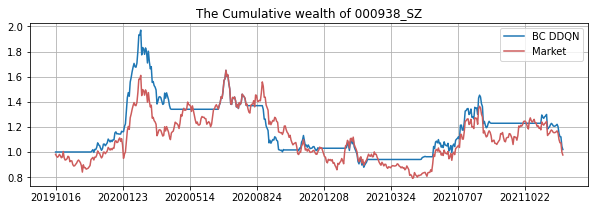

Balance: 175630.40239932784 Close Price: 67.33 Shares: 0


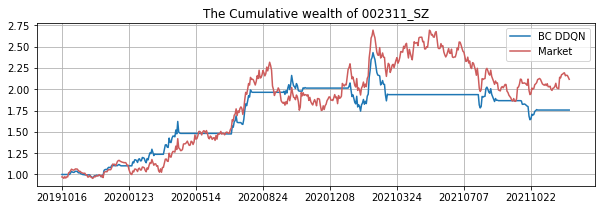

Balance: 0 Close Price: 52.15 Shares: 2130.4173369979762


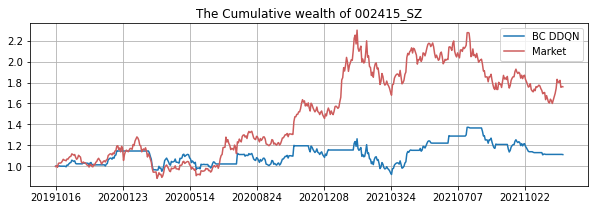

Balance: 317559.68046955945 Close Price: 278.98 Shares: 0


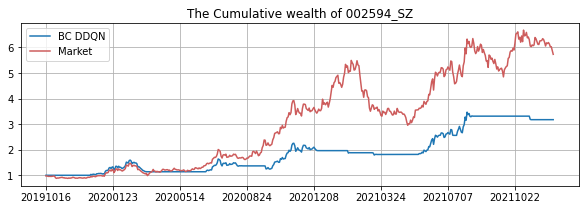

Balance: 0 Close Price: 43.6 Shares: 2052.929317931944


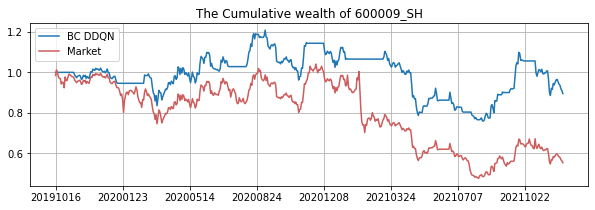

Balance: 0 Close Price: 4.2 Shares: 26357.661462815162


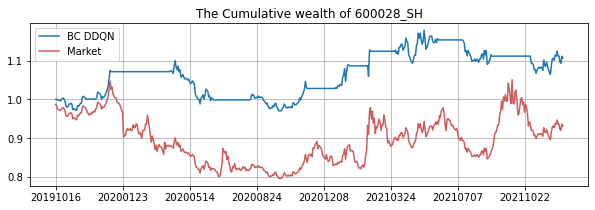

Balance: 0 Close Price: 23.54 Shares: 6863.176350476556


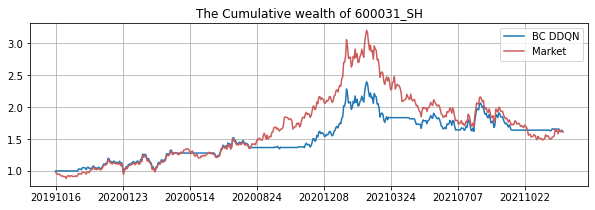

Balance: 0 Close Price: 50.77 Shares: 2467.9994721534204


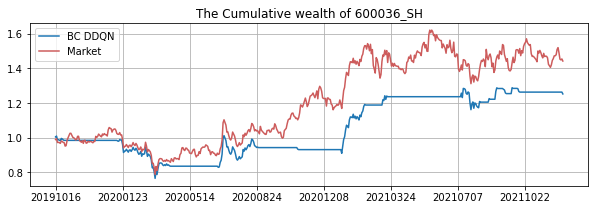

Balance: 89743.0787966912 Close Price: 62.68 Shares: 0


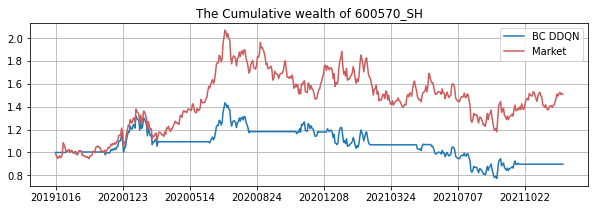

Balance: 0 Close Price: 12.6 Shares: 9014.050931985246


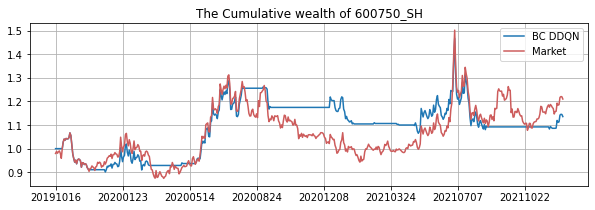

Balance: 208755.42751954697 Close Price: 68.9 Shares: 0


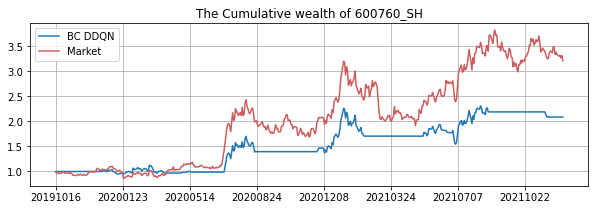

Balance: 225353.0690027151 Close Price: 35.23 Shares: 0


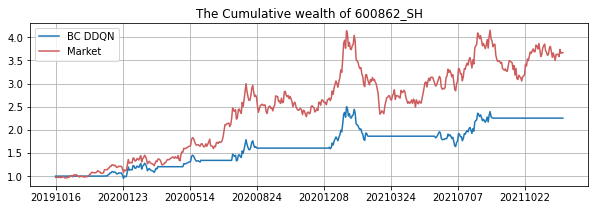

Balance: 83157.10930881702 Close Price: 2.93 Shares: 0


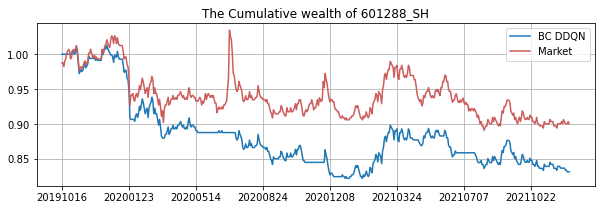

Balance: 0 Close Price: 29.93 Shares: 2423.156191687358


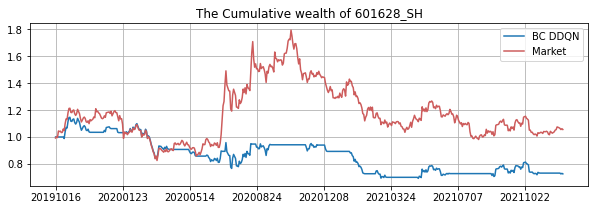

In [8]:
# 行为克隆 批量测试
SP = []
MDD = []
for name in stockName:
    Rate = multi_test_BC(name)
    sp = sharpe_Ratio(Rate)
    mdd = maxDrawdown(Rate)
    SP.append(sp)
    MDD.append(mdd)

In [10]:
MDD

[0.2018287441865297,
 0.4353190818187194,
 0.24412769568812043,
 0.4683462795203776,
 0.3991889262914598,
 0.1524292448453177,
 0.5541927006598288,
 0.3242565040085437,
 0.2705558771876931,
 0.28583096239761996,
 0.37120384179328825,
 0.11801255559612732,
 0.32558522429894843,
 0.24195436808949894,
 0.4607225457268312,
 0.2634271099744247,
 0.3169943317470311,
 0.3446920346914653,
 0.18831557699022192,
 0.39651717860147667]

In [18]:
# Dueling Dqn 测试
import torch
from Data.stock_data import data
from Model.DDQN.Dueling_DQN import DDQN_Agent
from Env.tradeEnv import portfolio_tradeEnv

def DDQN_Test(stockName):
    # 训练数据
    link = r'..\Data\\'+stockName+'.csv'
    trade_df = data(link, window_length=15, t=2000).trade_data()
    # 实例化智能体
    DDQN_agent = Agent(state_dim=150, hidden_dim=30, action_dim=3, lr=0.001, device="cuda:0", gamma=0.95,  epsilon=0.01, target_update=10)
    env = portfolio_tradeEnv(day=0, balance=100000, stock=trade_df, cost=0.003)
    DDQN_agent.load_state_dict(torch.load(r'..\Model\DDQN\result\agent_ddqn_'+stockName+'.pt'))
    state = env.reset()  # 返回初始状态
    for i in trade_df:
        state = torch.tensor(state.values, dtype=torch.float32).view(1, -1).to(device="cuda:0")
        action = DDQN_agent.take_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state

    time = []
    for i in trade_df:
        time.append(str(i.index.unique().values[-1]))
    name = link.split('\\')[-1].split('.')[0]

    # 平均投资
    balance = 100000
    price = trade_df[0].Close.values[-1]
    shares = (1-0.015)*balance/price
    Market_rate = []
    for i in range(len(trade_df)):
        Market_rate.append((shares*trade_df[i].Close.values[-1]-balance)/balance+1)

    import matplotlib.pyplot as plt
    # 策略收益率
    plt.figure(figsize=(10, 3))
    plt.title('The Cumulative wealth of '+name)
    plt.grid()
    plt.xticks(range(0, len(time), 70),)
    plt.plot(time[1:], env.rate, label='DDQN')
    plt.plot(time[1:], Market_rate[1:], c='#CD5C5C', label='Market')
    plt.legend()
    plt.show()
    return env.rate


Balance: 113621.5588223039 Close Price: 17.57 Shares: 0


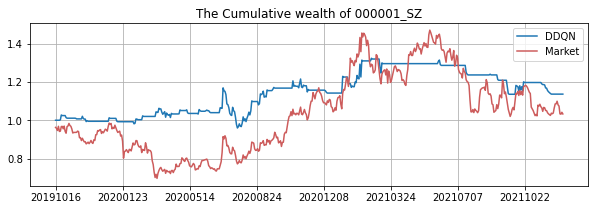

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0018270402823417,
 1.0274056029863856,
 1.0243233861774264,
 1.0243233861774264,
 1.0243233861774264,
 1.0243233861774264,
 1.0137247872459652,
 1.0106836128842271,
 1.0106836128842271,
 1.0106836128842271,
 1.0106836128842271,
 1.0106836128842271,
 1.0106836128842271,
 1.0106836128842271,
 1.0106836128842271,
 1.0106836128842271,
 1.0100647010833987,
 1.0070345069801485,
 1.0070345069801485,
 1.0070345069801485,
 1.0070345069801485,
 1.0070345069801485,
 1.0070345069801485,
 1.0205994361784125,
 1.0089723534408415,
 1.0059454363805187,
 1.0059454363805187,
 0.9929571159672542,
 0.9975030279787388,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9945105188948027,
 0.9

In [20]:
DDQN_Test(stockName[0])

In [ ]:
for name in stockName:
    DDQN_Test(name)

Balance: 110528.87373723956 Close Price: 17.57 Shares: 0


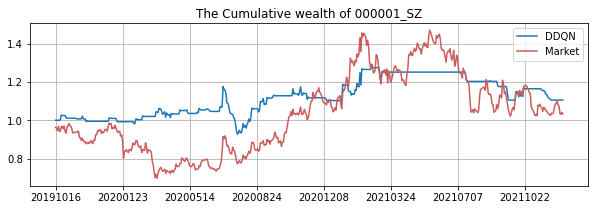

Balance: 0 Close Price: 19.53 Shares: 3437.0690437986036


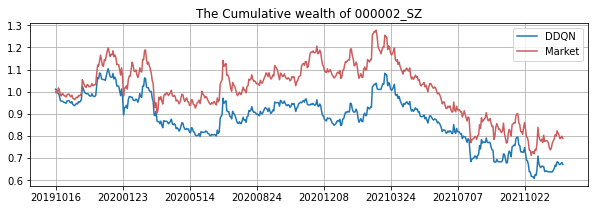

Balance: 102763.49239445773 Close Price: 248.51 Shares: 0


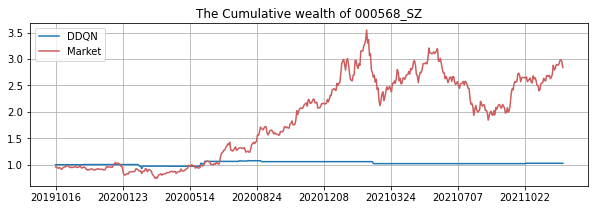

Balance: 55129.860809561724 Close Price: 17.17 Shares: 0


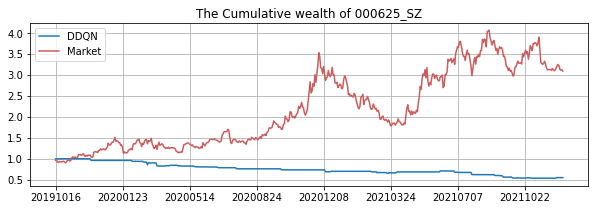

Balance: 85040.5101174661 Close Price: 35.5 Shares: 0


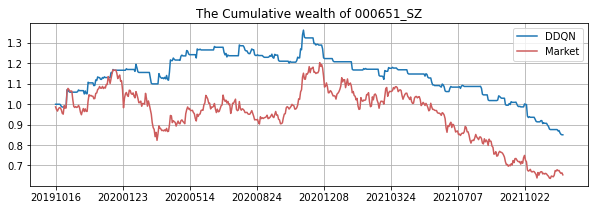

Balance: 87036.71795950839 Close Price: 24.4 Shares: 0


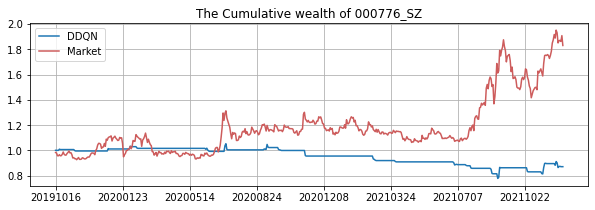

Balance: 0 Close Price: 21.68 Shares: 4717.432776672964


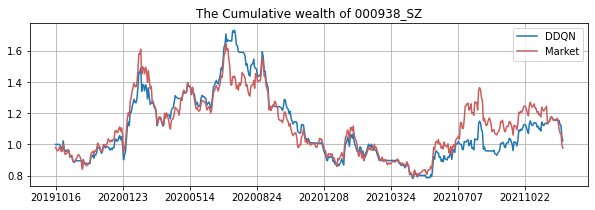

Balance: 136830.2570796113 Close Price: 67.33 Shares: 0


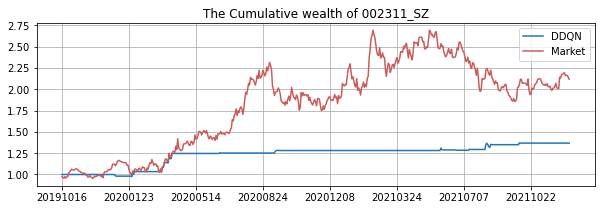

Balance: 235543.7610624783 Close Price: 52.15 Shares: 0


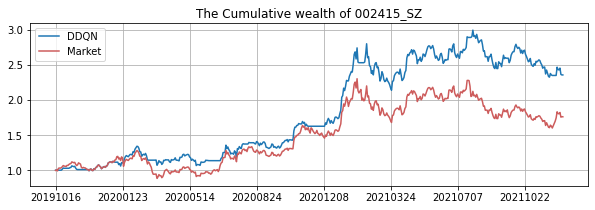

Balance: 0 Close Price: 278.98 Shares: 1308.4396316122657


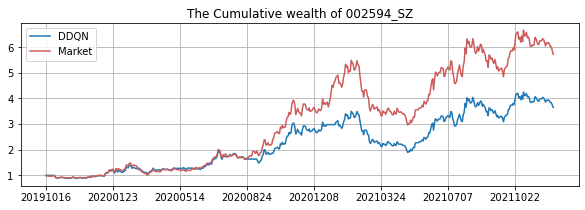

Balance: 87263.77630424952 Close Price: 43.6 Shares: 0


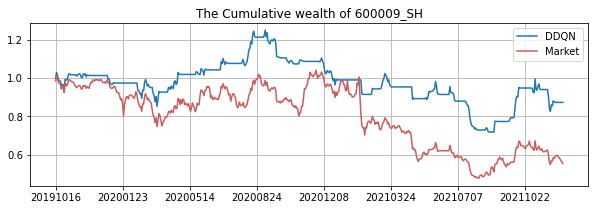

Balance: 84918.15785413494 Close Price: 4.2 Shares: 0


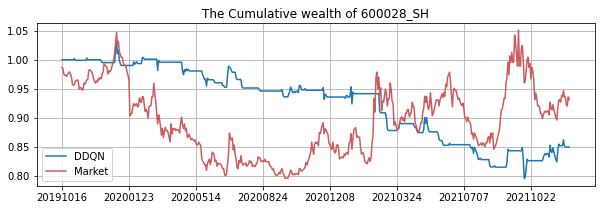

Balance: 109558.60024871823 Close Price: 23.54 Shares: 0


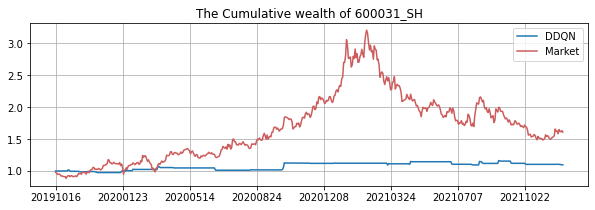

Balance: 105313.24097425897 Close Price: 50.77 Shares: 0


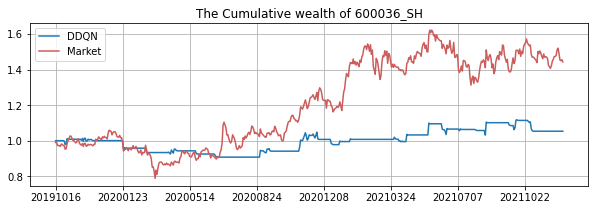

Balance: 83580.7588717174 Close Price: 62.68 Shares: 0


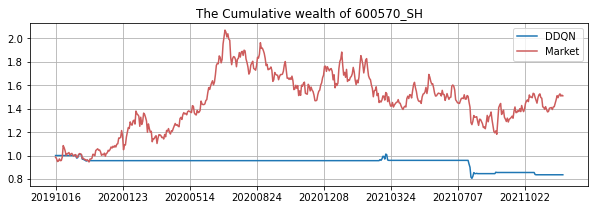

Balance: 0 Close Price: 12.6 Shares: 6533.513954456232


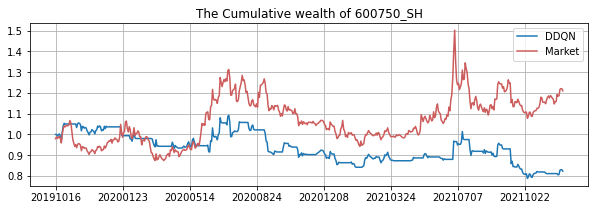

Balance: 0 Close Price: 68.9 Shares: 2048.486266711642


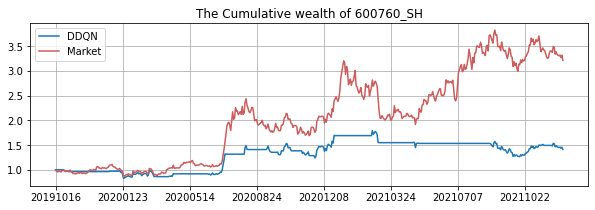

Balance: 139212.65892326154 Close Price: 35.23 Shares: 0


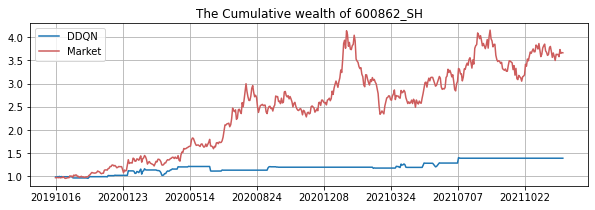

Balance: 0 Close Price: 2.93 Shares: 32453.992827539318


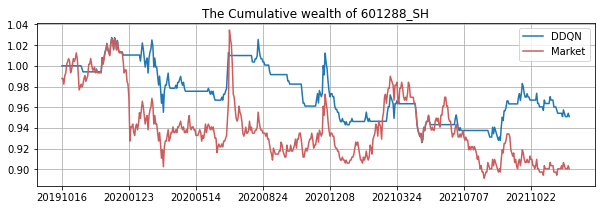

Balance: 76917.13773146387 Close Price: 29.93 Shares: 0


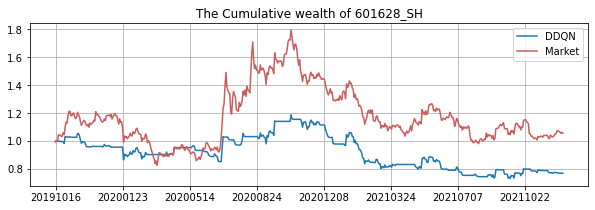

In [56]:
DDQN_SP = []
DDQN_MDD = []
for name in stockName:
    Rate = DDQN_Test(name)
    sp = sharpe_Ratio(Rate)
    mdd = maxDrawdown(Rate)
    DDQN_SP.append(sp)
    DDQN_MDD.append(mdd)

In [58]:
DDQN_MDD

[0.21201137223408267,
 0.449358160126001,
 0.08056219952014457,
 0.46904235606331546,
 0.37613366964394185,
 0.2608613079492233,
 0.548611056759805,
 0.03656716432388435,
 0.23651515149674088,
 0.4618691591474488,
 0.425290541821644,
 0.2292116657207933,
 0.05802079263455196,
 0.10488767219088499,
 0.20494029621013432,
 0.27808462225648145,
 0.2937727811681993,
 0.12347452028468464,
 0.09880961338747128,
 0.38392306334944576]

In [12]:
# DQN 测试
import torch
from Data.stock_data import data
from Env.tradeEnv import portfolio_tradeEnv
from Model.DQN.Deep_Q_Network import Agent

def DQN_Test(stockName):
    # 训练数据
    link = r'..\Data\\'+stockName+'.csv'
    trade_df = data(link, window_length=15, t=2000).trade_data()
    # 实例化智能体
    DQN_agent = Agent(state_dim=150, hidden_dim=30, action_dim=3, lr=0.001, device="cuda:0", gamma=0.95,  epsilon=0.01, target_update=10)
    env = portfolio_tradeEnv(day=0, balance=100000, stock=trade_df, cost=0.003)
    DQN_agent.load_state_dict(torch.load(r'..\Model\DQN\result\agent_dqn_'+stockName+'.pt'))
    state = env.reset()  # 返回初始状态
    for i in trade_df:
        state = torch.tensor(state.values, dtype=torch.float32).view(1, -1).to(device="cuda:0")
        action = DQN_agent.take_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state

    time = []
    for i in trade_df:
        time.append(str(i.index.unique().values[-1]))
    name = link.split('\\')[-1].split('.')[0]

    # 平均投资
    balance = 100000
    price = trade_df[0].Close.values[-1]
    shares = (1-0.015)*balance/price
    Market_rate = []
    for i in range(len(trade_df)):
        Market_rate.append((shares*trade_df[i].Close.values[-1]-balance)/balance+1)

    import matplotlib.pyplot as plt
    # 策略收益率
    plt.figure(figsize=(10, 3))
    plt.title('The Cumulative wealth of '+name)
    plt.grid()
    plt.xticks(range(0, len(time), 70),)
    plt.plot(time[1:], env.rate, label='DQN')
    plt.plot(time[1:], Market_rate[1:], c='#CD5C5C', label='Market')
    plt.legend()
    plt.show()
    return env.rate


Balance: 57174.55934104994 Close Price: 35.5 Shares: 0


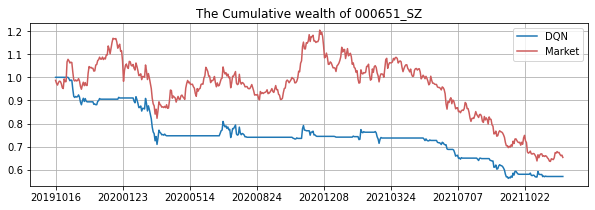

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9942591155592919,
 0.9852598913886734,
 0.988518231118584,
 0.9869666407384443,
 0.9491078355656113,
 0.9179208688222301,
 0.9131109387121801,
 0.9174553917423796,
 0.9147030255671526,
 0.9167232668412832,
 0.9240272154309206,
 0.9147030255671526,
 0.8927911794557882,
 0.8814467484891155,
 0.8983856933055585,
 0.9097301244434571,
 0.8957438396478051,
 0.9083314958954014,
 0.8968316616615972,
 0.8941411666766124,
 0.8941411666766124,
 0.8941411666766124,
 0.8941411666766124,
 0.8941411666766124,
 0.8941411666766124,
 0.8942850348620676,
 0.883351048011971,
 0.8845019939711627,
 0.8818484879892493,
 0.8818484879892493,
 0.8959636539002255,
 0.8995972610746632,
 0.908401770511905,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003692,
 0.9056765652003

In [13]:
DQN_Test(stockName[4])

Balance: 0 Close Price: 17.57 Shares: 5274.643428356534


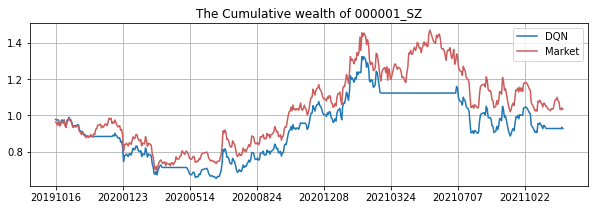

Balance: 60699.82831990836 Close Price: 19.53 Shares: 0


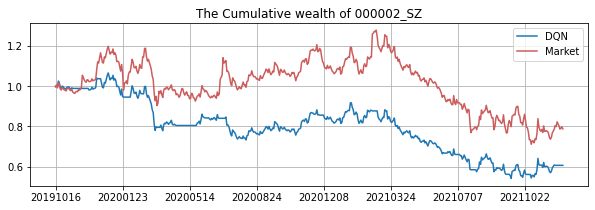

Balance: 0 Close Price: 248.51 Shares: 411.6586227342023


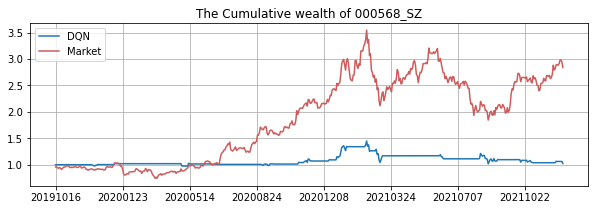

Balance: 92040.44444708376 Close Price: 17.17 Shares: 0


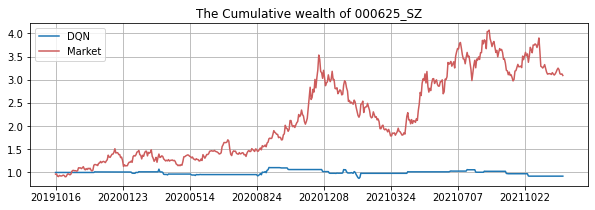

Balance: 58830.74263022159 Close Price: 35.5 Shares: 0


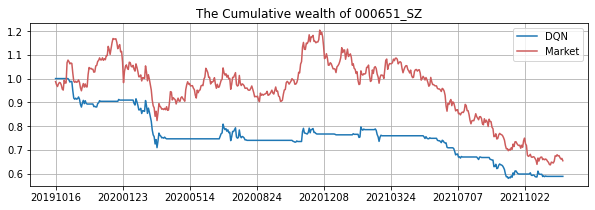

Balance: 0 Close Price: 24.4 Shares: 3667.6117754869156


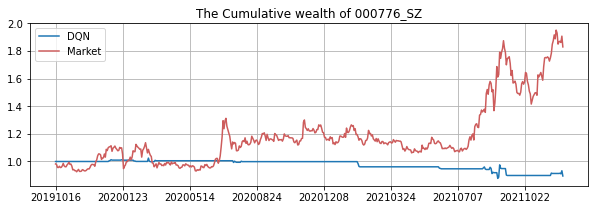

Balance: 0 Close Price: 21.68 Shares: 3520.7072505350775


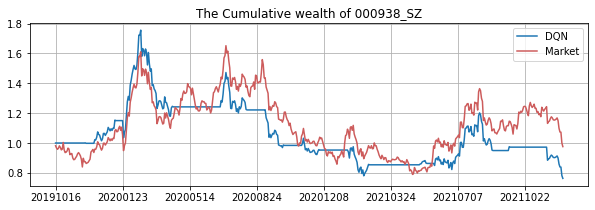

Balance: 79161.77134222748 Close Price: 67.33 Shares: 0


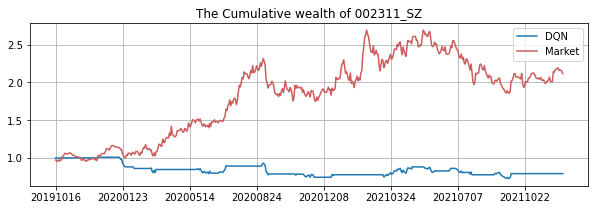

Balance: 116102.98661773904 Close Price: 52.15 Shares: 0


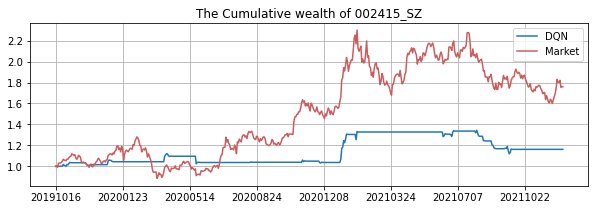

Balance: 128240.15350457837 Close Price: 278.98 Shares: 0


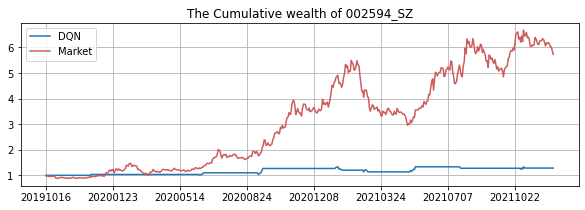

Balance: 0 Close Price: 43.6 Shares: 2343.3925421908248


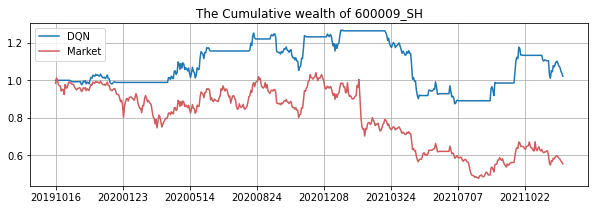

Balance: 84154.6750984303 Close Price: 4.2 Shares: 0


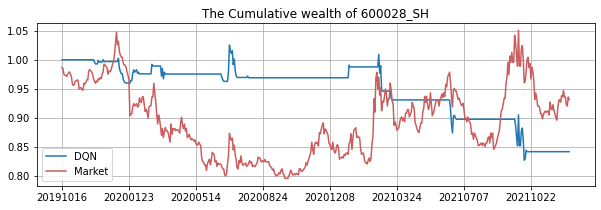

Balance: 138290.07986516206 Close Price: 23.54 Shares: 0


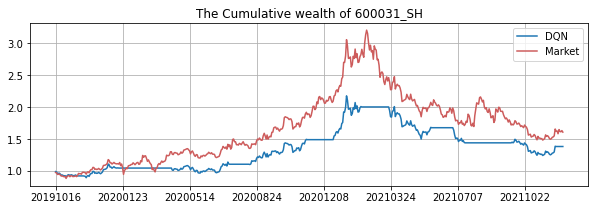

Balance: 115114.38673623222 Close Price: 50.77 Shares: 0


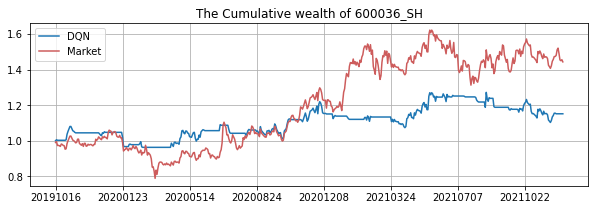

Balance: 84615.14326875372 Close Price: 62.68 Shares: 0


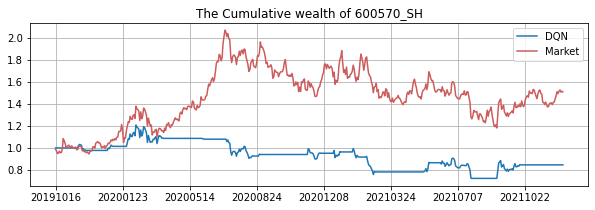

Balance: 83773.83375837846 Close Price: 12.6 Shares: 0


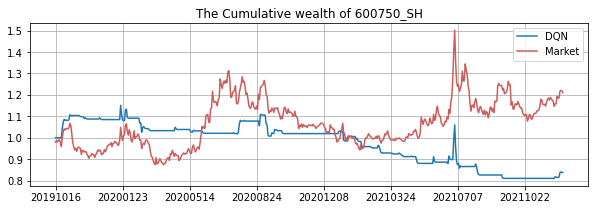

Balance: 212880.87244601725 Close Price: 68.9 Shares: 0


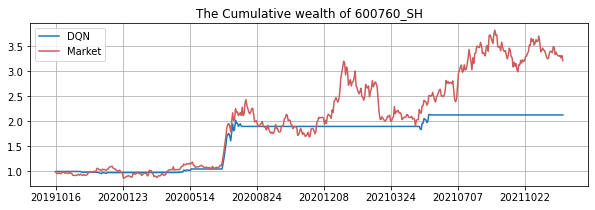

Balance: 203158.8042429237 Close Price: 35.23 Shares: 0


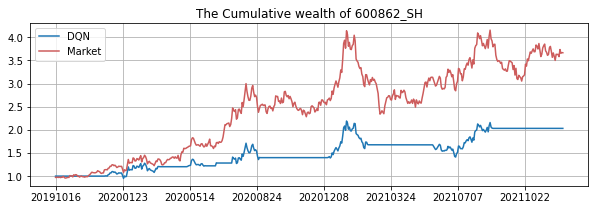

Balance: 0 Close Price: 2.93 Shares: 29994.420541349256


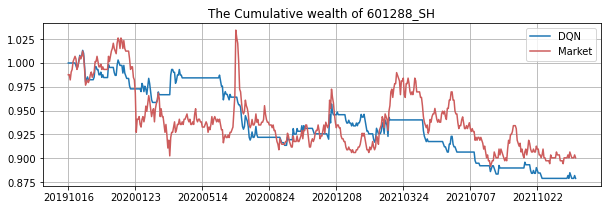

Balance: 73130.52928823876 Close Price: 29.93 Shares: 0


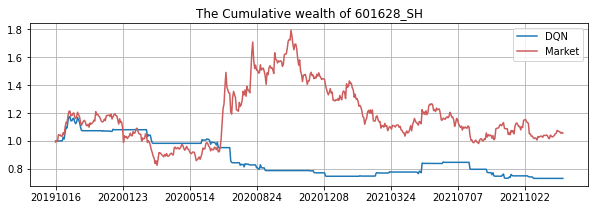

In [88]:
DQN_SP = []
DQN_MDD = []
for name in stockName:
    Rate = DQN_Test(name)
    sp = sharpe_Ratio(Rate)
    mdd = maxDrawdown(Rate)
    DQN_SP.append(sp)
    DQN_MDD.append(mdd)

In [62]:
DQN_MDD

[0.3331571780529703,
 0.5067780070220844,
 0.3006369862634084,
 0.1785901637961417,
 0.4079825442955699,
 0.1475558960551271,
 0.5904575279063546,
 0.248636578883294,
 0.1335863015819641,
 0.15081223693381957,
 0.3072040834539553,
 0.22314300025756892,
 0.4289783138727945,
 0.13316347372539497,
 0.40928429465416344,
 0.3087196153141545,
 0.0966777755321347,
 0.32949126850199595,
 0.15030621118196752,
 0.3330854326936047]

In [8]:
# Imitation Learning DDQN
import torch
from Data.stock_data import data
from Env.tradeEnv import portfolio_tradeEnv
from Model.ILQN.IL_Agent import IL_Agent

# 实例化智能体
agent = Agent(state_dim=150, hidden_dim=30, action_dim=3, lr=0.001, device="cuda:0", gamma=0.95,  epsilon=0.01, target_update=10)

def ILDDQN_Test(stockName, lambda_1):
     # 训练数据
    link = r'..\Data\\'+stockName+'.csv'
    trade_df = data(link, window_length=15, t=2000).trade_data()
    # 测试环境
    env = portfolio_tradeEnv(day=0, balance=100000, stock=trade_df, cost=0.003)

    agent.load_state_dict(torch.load(r'..\Model\ILQN\result\DDQN\agent_ddqn_'+stockName+'_'+str(lambda_1).replace('.', '_')+'.pt'))
    state = env.reset()  # 返回初始状态
    for i in trade_df:
        state = torch.tensor(state.values, dtype=torch.float32).view(1, -1).to(device="cuda:0")
        action = agent.take_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state

    time = []
    for i in trade_df:
        time.append(str(i.index.unique().values[-1]))
    name = link.split('\\')[-1].split('.')[0]

    # 平均投资
    balance = 100000
    price = trade_df[0].Close.values[-1]
    shares = (1-0.003)*balance/price
    Market_rate = []
    for i in range(len(trade_df)):
        Market_rate.append((shares*trade_df[i].Close.values[-1]-balance)/balance+1)

    import matplotlib.pyplot as plt
    # 策略收益率
    plt.figure(figsize=(10, 3))
    plt.title('The Cumulative wealth of '+name)
    plt.grid()
    plt.xticks(range(0, len(time), 70),)
    plt.plot(time[1:], env.rate, label='ILDDQN')
    plt.plot(time[1:], Market_rate[1:], c='#CD5C5C', label='Market')
    plt.legend()
    plt.show()
    return env.rate


In [1]:
ILDDQN_Test(stockName=stockName[16], lambda_1=0.5)

NameError: name 'ILDDQN_Test' is not defined

Balance: 0 Close Price: 17.57 Shares: 8479.791353428836


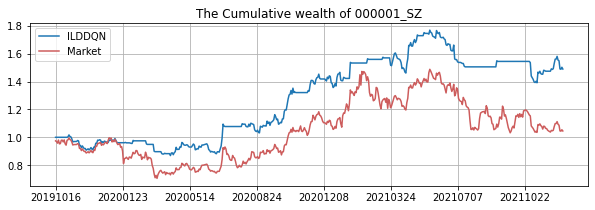

Balance: 0 Close Price: 19.53 Shares: 2571.1699177027335


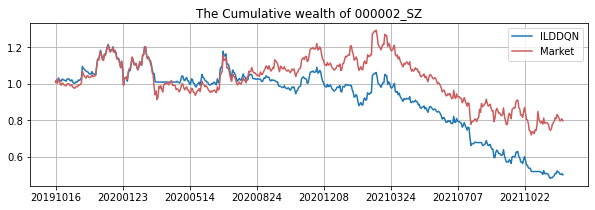

Balance: 94479.94700875151 Close Price: 248.51 Shares: 0


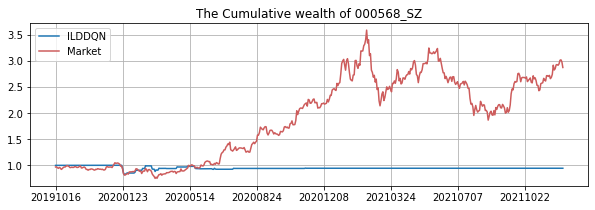

Balance: 201113.15690208523 Close Price: 17.17 Shares: 0


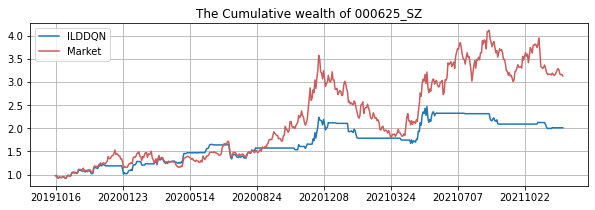

Balance: 0 Close Price: 35.5 Shares: 1868.2109661923528


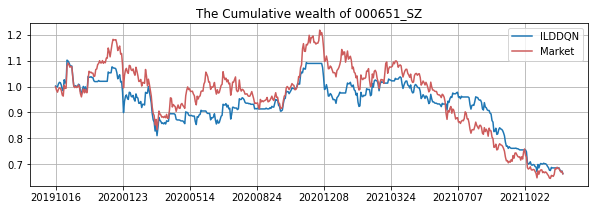

Balance: 114650.46898958643 Close Price: 24.4 Shares: 0


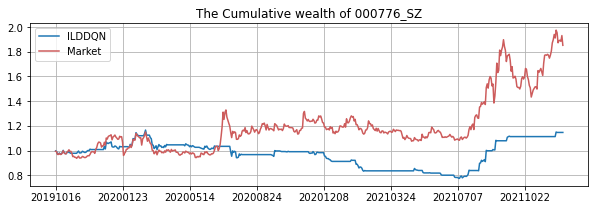

Balance: 0 Close Price: 21.68 Shares: 4166.201305517157


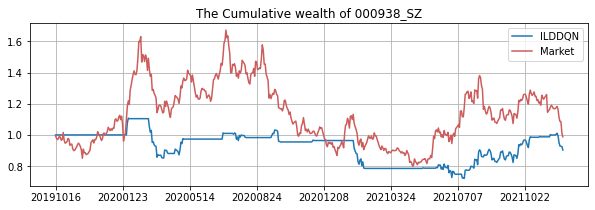

Balance: 131990.0952957426 Close Price: 67.33 Shares: 0


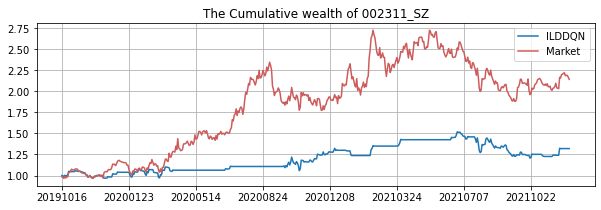

Balance: 97031.042254417 Close Price: 52.15 Shares: 0


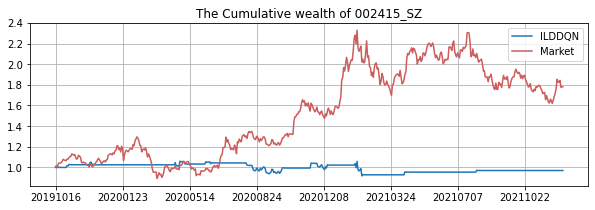

Balance: 142098.50478455273 Close Price: 278.98 Shares: 0


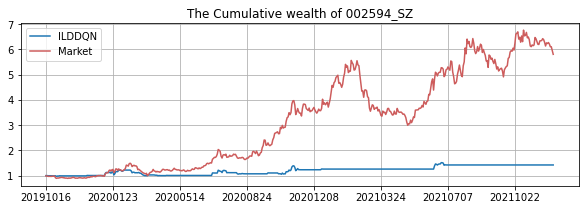

Balance: 0 Close Price: 43.6 Shares: 1286.2064758984286


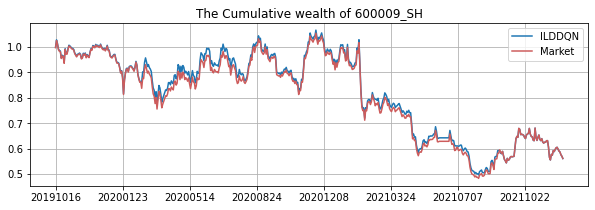

Balance: 0 Close Price: 4.2 Shares: 14897.66902692691


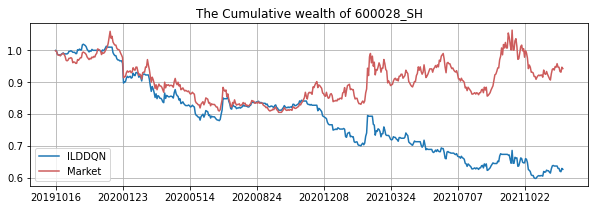

Balance: 0 Close Price: 23.54 Shares: 6934.997499347394


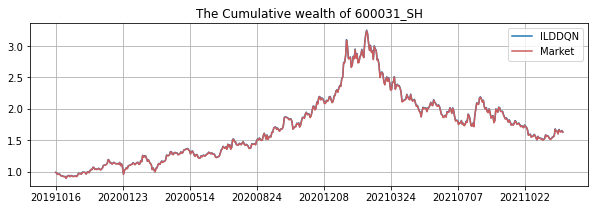

Balance: 99444.05630028868 Close Price: 50.77 Shares: 0


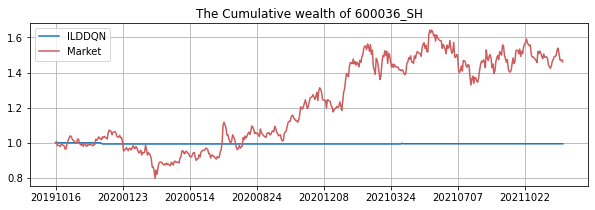

Balance: 97088.31737410539 Close Price: 62.68 Shares: 0


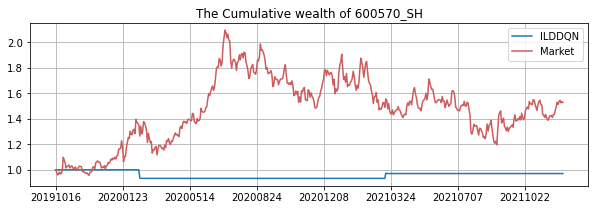

Balance: 97268.29265820971 Close Price: 12.6 Shares: 0


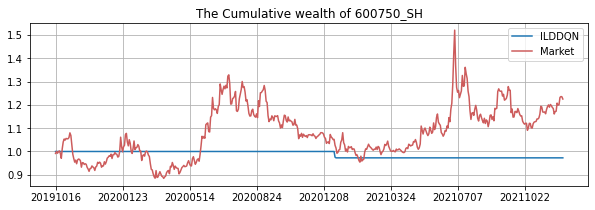

Balance: 111538.52638099207 Close Price: 68.9 Shares: 0


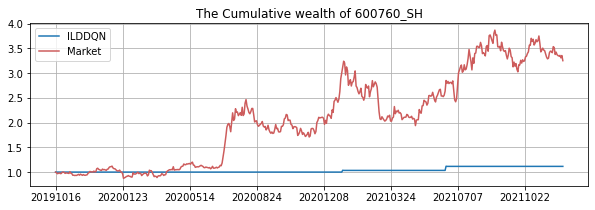

Balance: 100716.9890135666 Close Price: 35.23 Shares: 0


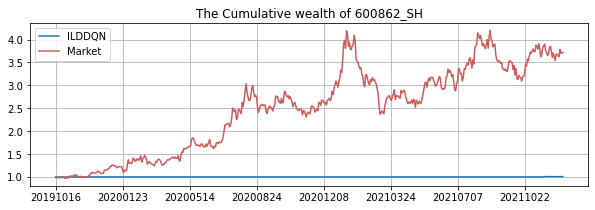

Balance: 98785.3211202207 Close Price: 2.93 Shares: 0


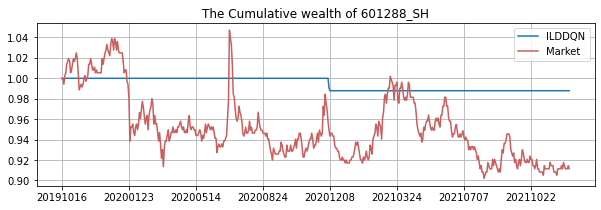

Balance: 98258.83204732166 Close Price: 29.93 Shares: 0


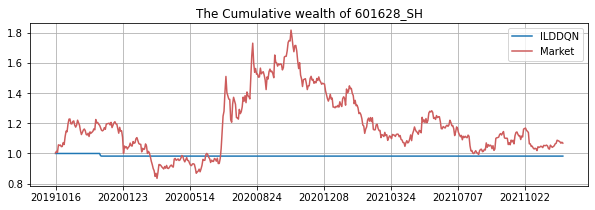

In [69]:
ILDDQN_SP = []
ILDDQN_MDD = []

for name in stockName:
    Rate = ILDDQN_Test(name, lambda_1=0.5)
    sp = sharpe_Ratio(Rate)
    mdd = maxDrawdown(Rate)
    ILDDQN_SP.append(sp)
    ILDDQN_MDD .append(mdd)

In [72]:
DDQN_MDD

[0.21201137223408267,
 0.449358160126001,
 0.08056219952014457,
 0.46904235606331546,
 0.37613366964394185,
 0.2608613079492233,
 0.548611056759805,
 0.03656716432388435,
 0.23651515149674088,
 0.4618691591474488,
 0.425290541821644,
 0.2292116657207933,
 0.05802079263455196,
 0.10488767219088499,
 0.20494029621013432,
 0.27808462225648145,
 0.2937727811681993,
 0.12347452028468464,
 0.09880961338747128,
 0.38392306334944576]

Balance: 0 Close Price: 17.57 Shares: 8289.639760230913


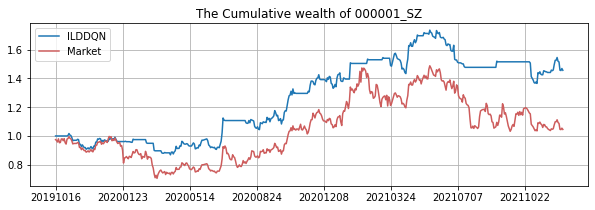

Balance: 140687.3080446204 Close Price: 17.57 Shares: 0


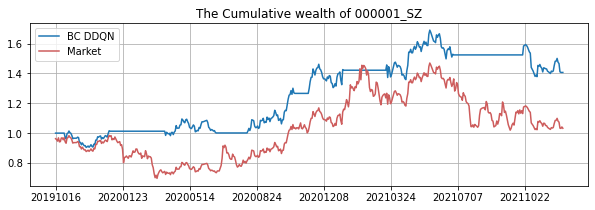

RuntimeError: Error(s) in loading state_dict for Agent:
	Missing key(s) in state_dict: "Q_Net.fc_A.weight", "Q_Net.fc_A.bias", "Q_Net.fc_V.weight", "Q_Net.fc_V.bias", "Target_Q_Net.fc_A.weight", "Target_Q_Net.fc_A.bias", "Target_Q_Net.fc_V.weight", "Target_Q_Net.fc_V.bias". 
	Unexpected key(s) in state_dict: "Q_Net.linear2.weight", "Q_Net.linear2.bias", "Target_Q_Net.linear2.weight", "Target_Q_Net.linear2.bias". 

In [23]:
# 总图
#
stock_name = stockName[0]
ILDDQN_Rate = ILDDQN_Test(stock_name, lambda_1=0.5)
BC = multi_test_BC(stock_name)
DQN_Rate = DQN_Test(stock_name)
DDQN_Rate = DDQN_Test(stock_name)


link = r'..\Data\\'+stock_name+'.csv'
trade_df = data(link, window_length=15, t=2000).trade_data()

time = []
for i in trade_df:
    time.append(str(i.index.unique().values[-1]))
    name = link.split('\\')[-1].split('.')[0]

# 平均投资
balance = 100000
price = trade_df[0].Close.values[-1]
shares = (1-0.015)*balance/price
Market_rate = []
for i in range(len(trade_df)):
    Market_rate.append((shares*trade_df[i].Close.values[-1]-balance)/balance+1)

import matplotlib.pyplot as plt
# 策略收益率
plt.figure(figsize=(10, 3))
plt.title('The Cumulative wealth of '+stock_name)
plt.grid()
plt.xticks(range(0, len(time), 70),)
plt.plot(time[1:], ILDDQN_Rate, label='ILDDQN')
plt.plot(time[1:], BC, label='BC')
plt.plot(time[1:], DDQN_Rate, label='DDQN')
plt.plot(time[1:], DQN_Rate, label='DQN')
plt.plot(time[1:], Market_rate[1:], c='#CD5C5C', label='Market')
plt.legend()
plt.show()